# QuantumSim - Quantum Teleportation
Author: Nico Kuijpers<br>
Date: December 22, 2024

This notebook is based on the following notebook from Qiskit, but uses QuantumSim instead of Qiskit.

https://github.com/qiskit-community/qiskit-community-tutorials/blob/master/Coding_With_Qiskit/ep5_Quantum_Teleportation.ipynb

In [1]:
from quantumsim import *

## Introduction
Quantum teleportation means the transfer of a quantum state from one qubit to another. Using classical computers, a state can be transferred by copying. In quantum computers this is not possible, because copying requires measuring, and measuring destroys the quantum state. To circumvent this problem, qubits of the sender and receiver are entangled. By measuring the qubits of the sender, the quantum state of the sender's qubit is transfered to the receiver's qubit.

Suppose Alice wants to send the state of her qubit $|\psi\rangle$ to Bob. Then the teleportation protocol can be described as follows:
1. Alice and Bob create an entangled Bell pair between two qubits by applyng a Hadamard and a CNOT operation. Alice retains one of the qubits and Bob the other one.
2. Alice applies a CNOT and Hadamard operation between the qubit with state $|\psi\rangle$ and her half of the Bell pair.
3. Alice measures both her qubits and sends two classical bits to Bob containing the results of the two measurements.
4. Bob receives the classical bits. Depending on the values of the classical bits, he applies a Pauli X and/or Pauli Z operation on his qubit.
5. Bob's qubit now has state $|\psi\rangle$, while Alice's qubits are collapsed.

To implement teleportation in QuantumSim, measurement of a single qubit is applied. Upon measuring a single qubit, the quantum state of the circuit is adapted on the basis of the outcome of the measurement. 

In following notebook it is explained how measuring a single qubit is implemented in QuantumSim.

https://github.com/nicokuijpers/QuantumSim/blob/main/QuantumSimQubitMeasurement.ipynb

## Example circuit for teleportation

In this example, a circuit of 3 qubits is used to transfer the state of qubit 0 to qubit 2. The state of qubit 0 is set to $|1\rangle$ by applying a Pauli X operation.

Next, entanglement between qubit 1 and qubit 2 is established by applying a Hadamard gate on qubit 1 and then a CNOT gate with control qubit 1 and target qubit 2.

Now, qubit 1 and qubit 2 are entangled. The next step is to apply a CNOT gate between qubit 0 and qubit 1 and then a Hadamard gate on qubit 0. 

After this, qubit 0 and qubit 1 are measured. Measurement of a single qubit results in collapse of the quantum state of that qubit to either $|0\rangle$ or $|1\rangle$.
It is assumed that qubit 0 and qubit 1 remain in one of the basis states $|0\rangle$ or $|1\rangle$ to be used as control qubits later on. Other tutorials sometimes use classical bits to store the measurements and use these as control bits later on.

To complete the teleportation protocol, two more gates are added: a CNOT with control qubit 1 and target qubit 2, and a controlled Pauli Z operation with control qubit 0 and target qubit 2. In other tutorials, these operations are controlled by the values of the classical bits. 

With this protocol, the state of qubit 0 at the start is teleported to qubit 2!

In [2]:
# Create a circuit of 3 qubits
# Qubit 0 is in the possession of Alice and has state |psi>, the state to be teleported
# Qubit 1 is Alice's half of the Bell pair
# Qubit 2 is Bob's half of the Bell pair and also the destination of the teleportation
circuit = Circuit(3)

# ========================
# Step 0: Create the state to be teleported in qubit 0
circuit.pauli_x(0) # qubit 0 is now in state |1>, and this is the state to be teleported

# ========================
# Step 1: create an entangled Bell pair between Alice and Bob (qubits 1 and 2)
circuit.hadamard(1)
circuit.cnot(1,2)

# ========================
# Step 2: Alice applies a series of operations 
# between the state to teleport (qubit 0) and her half of the Bell pair (qubit 1)
circuit.cnot(0,1)
circuit.hadamard(0)

# ========================
# Step 3: Alice measures both qubits 0 and 1
circuit.measure_qubit(0)
circuit.measure_qubit(1)

# ========================
# Step 4: Now that Alice has measured the two qubits, their states have collapsed to 0 and 1. 
# Bob can do operations conditioned on these qubits to his half of the Bell pair
# Note that while we're conditioning Bob's operation on the collapsed qubits 0 and 1, we can
# do teleportation over long distances by transmitting the classical information in classical bits 0 and 1
circuit.cnot(1, 2)
circuit.controlled_pauli_z(0, 2)

# Step 5: Bob's qubit now has state |1>, the state that was teleported
circuit.execute()
circuit.measure()
state_as_string = circuit.get_classical_state_as_string()
print(f'Measured state {state_as_string}')

Measured state |101>


Run the code block above multiple times and confirm that the measured state is of the form $|\kern-2pt\ast \kern-2pt \ast 1\rangle$. This is because the state of qubit 2 should be equal to the state that was teleported, in this case $|1\rangle$.

Now, we run this circuit 1000 times and we create a histogram showing the occurrences of measured classical states. 
The states $|001\rangle$, $|011\rangle$, $|101\rangle$, and $|111\rangle$ should each occur about 250 times.

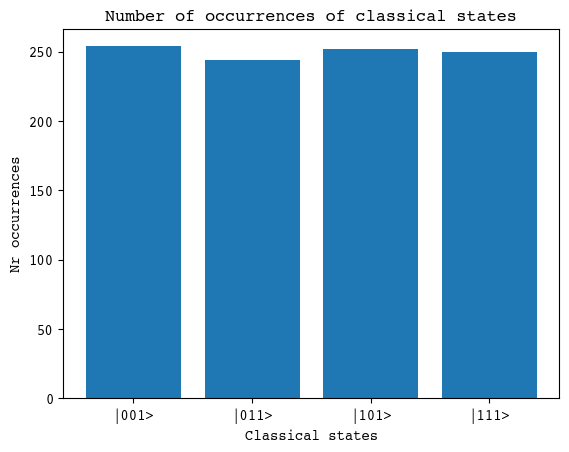

In [3]:
result = QuantumUtil.run_circuit(circuit, nr_runs=1000)
QuantumUtil.histogram_of_classical_states(result)

## Function to create a circuit for teleportation

Below, function *create_teleport_circuit()* is defined to teleport a quantum state $|\psi\rangle$ defined by Euler angles $\theta$, $\phi$, and $\lambda$. To initiate the state to be teleported, the $U$-gate will be used.

The $U$-gate is introduced in the following QuantumSim notebook:

https://github.com/nicokuijpers/QuantumSim/blob/main/QuantumSimUGate.ipynb

In [4]:
def create_teleport_circuit(theta, phi, lam):

    # Create a circuit of 3 qubits
    # Qubit 0 is in the possession of Alice and has state |psi>, the state to be teleported
    # Qubit 1 is Alice's half of the Bell pair
    # Qubit 2 is Bob's half of the Bell pair and also the destination of the teleportation
    circuit = Circuit(3)

    # ========================
    # Step 0: Create the state |psi> to be teleported in qubit 0
    circuit.u_gate(theta, phi, lam, 0)

    # ========================
    # Step 1: create an entangled Bell pair between Alice and Bob (qubits 1 and 2)
    circuit.hadamard(1)
    circuit.cnot(1,2)

    # ========================
    # Step 2: Alice applies a series of operations 
    # between the state to teleport (qubit 0) and her half of the Bell pair (qubit 1)
    circuit.cnot(0,1)
    circuit.hadamard(0)

    # ========================
    # Step 3: Alice measures both qubits 0 and 1
    circuit.measure_qubit(0)
    circuit.measure_qubit(1)

    # ========================
    # Step 4: Now that Alice has measured the two qubits, their states have collapsed to 0 and 1. 
    # Bob can do operations conditioned on these qubits to his half of the Bell pair
    # Note that while we're conditioning Bob's operation on the collapsed qubits 0 and 1, we can
    # do teleportation over long distances by transmitting the classical information in classical bits 0 and 1
    circuit.cnot(1, 2)
    circuit.controlled_pauli_z(0, 2)

    # Step 5: Bob's qubit now has state |psi>, the state that was teleported
    return circuit

Below, a teleportation circuit is created with $\theta = \frac{\pi}{3}$, $\phi = \frac{\pi}{5}$, and $\lambda = \frac{\pi}{6}$. 

In [5]:
theta = np.pi/3
phi = np.pi/5
lam = np.pi/6
circuit = create_teleport_circuit(theta, phi, lam)
circuit.execute()
circuit.measure()
state_as_string = circuit.get_classical_state_as_string()
print(f'Measured state {state_as_string}')

Measured state |010>


As before, we run this circuit 1000 times and we create a histogram showing the occurrences of measured classical states. The values of $\theta$, $\phi$, and $\lambda$ are chosen such that the probability of measuring $|0\rangle$ is higher than the probability of measuring $|1\rangle$.

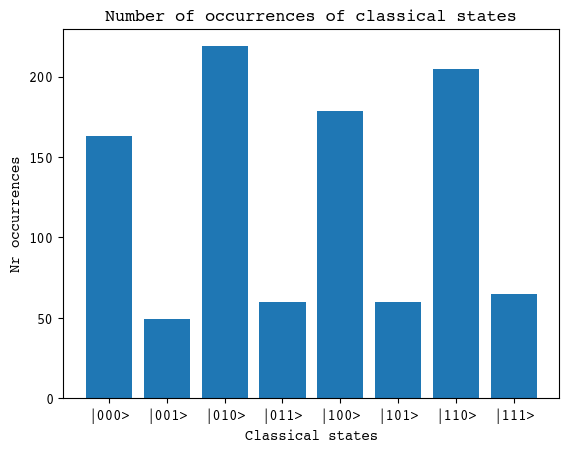

In [6]:
result = QuantumUtil.run_circuit(circuit, nr_runs=1000)
QuantumUtil.histogram_of_classical_states(result)

Below, intermediate probabilities and quantum states for the latest execution of the circuit are shown using functions *QuantumUtil.show_all_probabilities()* and 
*QuantumUtil.show_all_intermediate_states()*. It can be observed how the state of qubit 0 is 'teleported' to qubit 2.

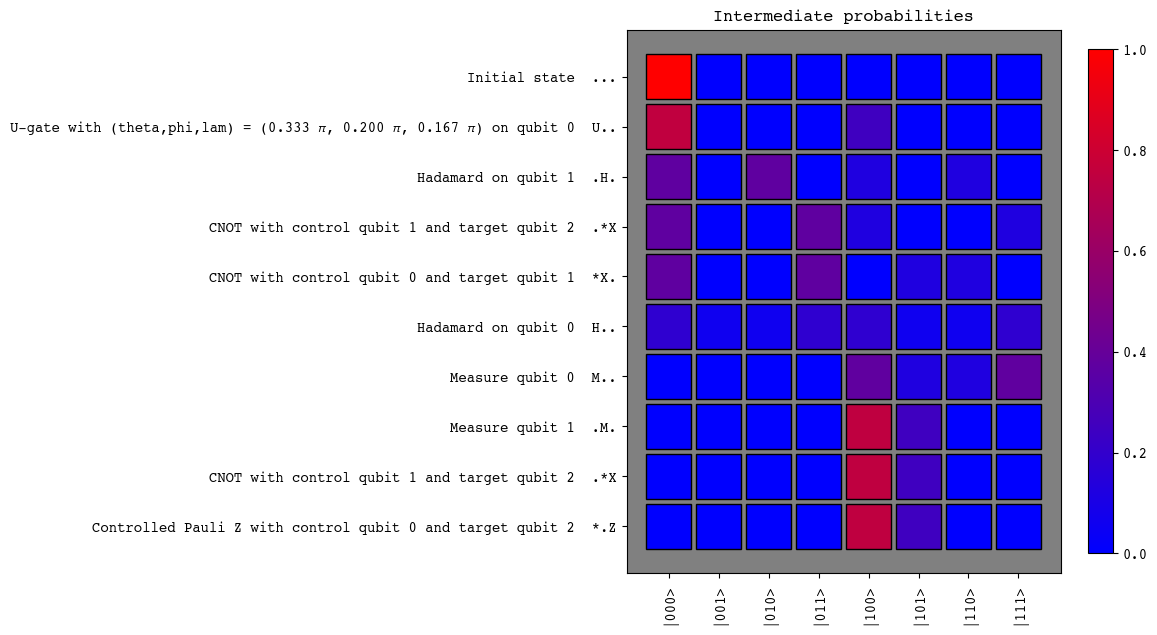

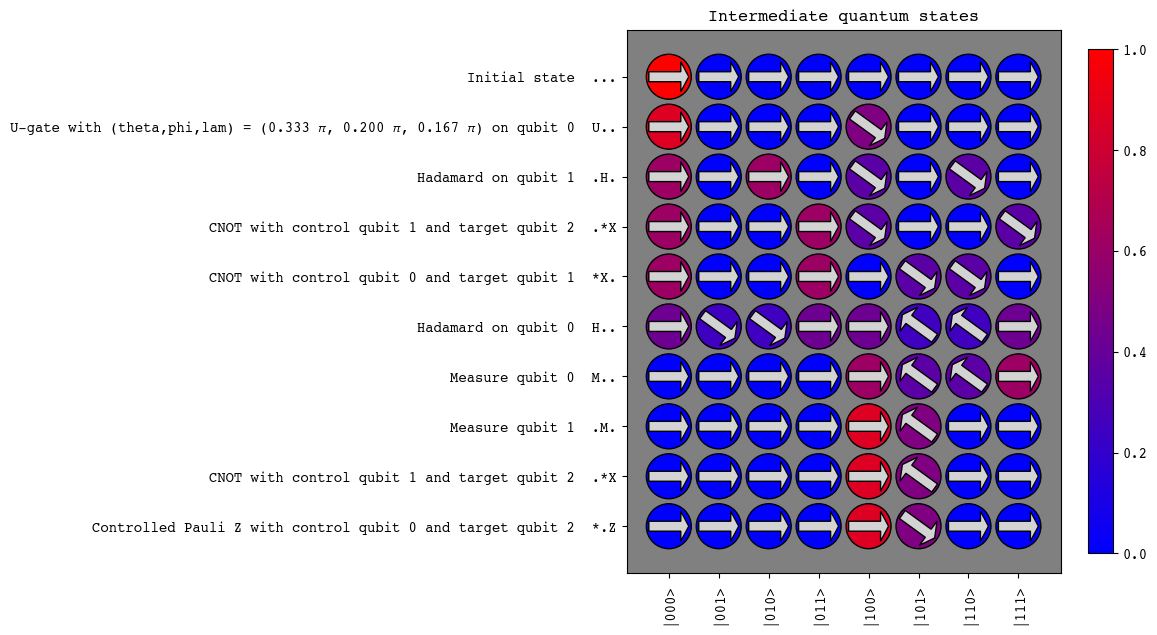

In [7]:
QuantumUtil.show_all_probabilities(circuit)
QuantumUtil.show_all_intermediate_states(circuit)

## Example loop over theta
Below, function *create_teleport_circuit()* is used to loop over values for $\theta$ between $0$ and $4\pi$ with steps of $\pi/8$.
Each circuit is executed 1000 times and the results are stored as an array of strings representing the final classical state of the circuit.
Next, the number of occurrences of 1 at the position of qubit 2 are counted and stored as percentage.

Please note that running the code below might take some time.

In [8]:
import numpy as np

thetas = np.arange(0, 4*np.pi + np.pi/8, np.pi/8)
percent_ones = []
nr_runs = 1000
pi_symbol = '\u03c0'
for theta in thetas:
    print(f"theta = {theta/np.pi} {pi_symbol}")
    circuit = create_teleport_circuit(theta,0,0)
    result = QuantumUtil.run_circuit(circuit, nr_runs=nr_runs)
    count = sum(1 for s in result if len(s) > 3 and s[3] == '1')
    percent_ones.append(count*100/nr_runs)

theta = 0.0 π
theta = 0.125 π
theta = 0.25 π
theta = 0.375 π
theta = 0.5 π
theta = 0.625 π
theta = 0.75 π
theta = 0.875 π
theta = 1.0 π
theta = 1.125 π
theta = 1.25 π
theta = 1.3749999999999998 π
theta = 1.5 π
theta = 1.6250000000000002 π
theta = 1.75 π
theta = 1.8749999999999998 π
theta = 2.0 π
theta = 2.125 π
theta = 2.25 π
theta = 2.375 π
theta = 2.5 π
theta = 2.625 π
theta = 2.7499999999999996 π
theta = 2.875 π
theta = 3.0 π
theta = 3.125 π
theta = 3.2500000000000004 π
theta = 3.375 π
theta = 3.5 π
theta = 3.625 π
theta = 3.7499999999999996 π
theta = 3.875 π
theta = 4.0 π


Below, the percentage of ones is plotted against $\theta$. It can be observed that the percentage of ones periodically changes with $\theta$.

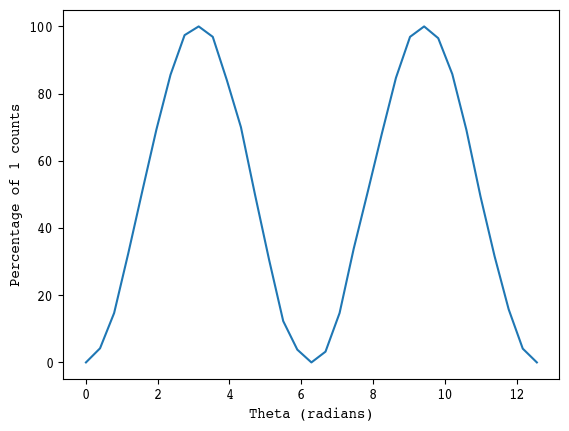

In [9]:
import matplotlib.pyplot as plotter

plotter.plot(thetas, percent_ones)
plotter.xlabel('Theta (radians)')
plotter.ylabel('Percentage of 1 counts')
plotter.show()